<h1>Lineare Regression</h1>

Lineare Regression ist einer der simplen Techniken, um Vorhersagen zu treffen.

Bei einem gegebenen Dataset versuch das Model die Punkte durch eine Gerade zu verallgemeinern.

Dabei müssen die Datenpunkte eine lineare Relation aufweisen.
- Z. B. für Datasets wo es um Stockprices oder Housing Prices geht.


In [2]:
# Imports
import pandas as pd
import numpy  as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [19]:
# Überschaubares Dataset.
x_data = [2, 4, 5, 6, 8, 10, 12]  # X-Werte
y_data = [1, 3, 5, 8, 9, 9, 11]   # Y-Werte

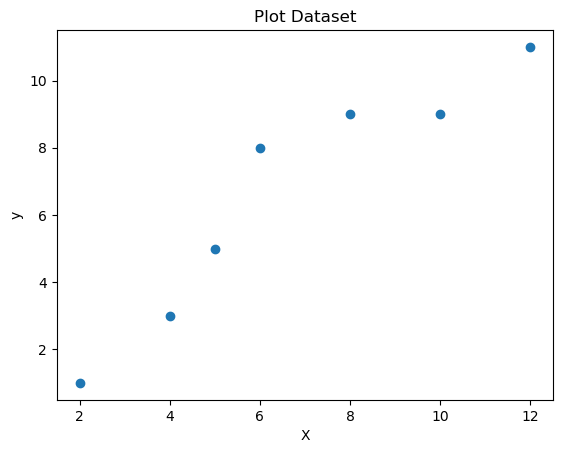

In [4]:
plt.title('Plot Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(x_data, y_data)

Ziel der linearen Regression ist es, eine Gerade zu finden, die alle Punkte möglichst gleich abdeckt. Mit anderen Worten, dass der Abstand von den Punkten zur Geraden minimiert wird.

Auf dem Scatterplot sieht man deutlich, dass die Punkte ein wenig linear angeordnet sind. Man könnte also eine Linie durchziehen. 

In [17]:
# Erstelle Model und trainiere.
model = LinearRegression()
model.fit(np.array(x_data).reshape(-1,1), y_data)

LinearRegression()

Nach dem Trainieren kann das Model den Koeffizienten und das <i>b</i> ausgeben.

In [22]:
# Eine einfache Gerade die man zeichnen könnte.
gerade = [model.coef_, model.intercept_]
gerade

[array([0.98249027]), -0.025291828793775117]

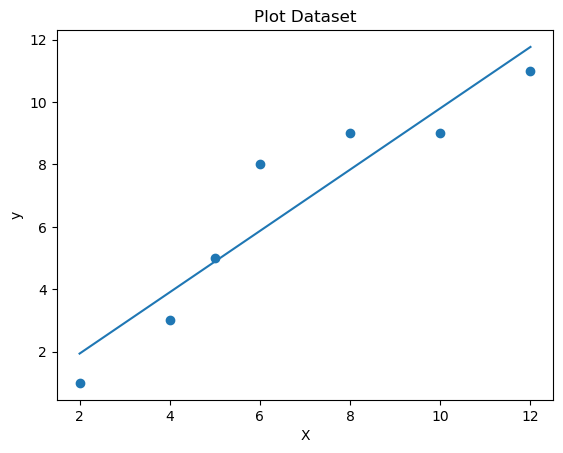

In [42]:
plt.title('Plot Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x_data, model.predict(np.array([x_data]).reshape(7, 1)) )
plt.scatter(x_data, y_data)

Wie eine Prediction abläuft, ist sehr gut überschaubar.

In [46]:
model.predict([[7]])

array([6.85214008])

Oder mit der Formel  mx+b:

In [44]:
7 * 0.98249027 - 0.025291828793775117

6.852140061206225

Dasselbe Spiel geht auch wenn das Dataset mehrere Features hat (x_n = Feature_n).

$
 f(x) = m_1 * x_1 + m_2 * x_2 + m_n * x_n + b
$

Um die passende Gerade zu finden, kann zu Beginn eine Gerade gezogen werden, die dann versucht schrittweise die Datenpunkte abzudecken.

Dabei wird der Fehler berechnet durch die Predictions der Linie und den eigentlichen Positionen der Datenpunkte.
- Abstand der Geraden (Prediction Funktion) zu den Datenpunkten soll minimiert werden. <br>
  => MSE

<i>Abb1</i>: Fehler der Predictions.

<img src="./files_data/img/sklearn_lr_1.PNG" width=500 hight=500>

>Die Formel für MSE ist dabei:

$$
MSE = \frac{1}{N} \sum_{i=1}^N{(y_i - y_{pred})^2}
$$


Die Datenpunkte werden quadriert, um negative Werte zu vermeiden, dann summiert und die Anzahl der Datenpunkte dividiert.<br>
Heraus kommt eine Zahl die aus der Summe vieler einzelnen Fehler der Predictions, und so kann die Gerade langsam in die Richtig gelenkt werde,n wo dieser Gesamtfehler minimal ist.
- Diese Formal wird als Kostenfunktion und Loss bezeichnet. Es gibt verschiedene Kostenfunktionen.
- Durch das Optimieren der eingesetzten Funktion durch Minimieren eines Fehlers, der durch eine Kostenfunktion berechnet wird, kann so die Prediction Funktion kommende Abfragen besser / qualitativer beantworten.
- Bei anderen Methoden kommen noch weitere Parameter ins Spiel, die eine wichtige Rolle spielen.
- Anhand der linearen Regression ist gut sichtbar, wie so ein Prozess abläuft.

Um den Wert der Prediction zu bekommen, wird die Prediction Funktion in die Formel eingesetzt.

Mit der MSE-Formel und der Funktion, die hier als Gerade (mx + b) dargestellt ist, muss durch einen Algorithmus die optimalen Werte für m und b finden.

Diese Suche kann z. B. mit dem Gradientenabstieg durchgeführt werden.

1. Bei dem Gradientenabstieg fangen wir mit einem Wert für m und b, z. B. mit 1 oder 0 für beide. <br>
2. Ab diesen Punkt wird der MSE-Wert berechnet.
3. Dann wird je nach Schrittweite $ \lambda $ die Werte von m und b gesenkt => Bewegung richting Minima. <br>
   $ \lambda $ kann statisch bleiben oder sich ändern => Reduziere Schrittweite beim Annähern an Minima. <br>
   Die Schrittweite wird auch als Learning Rate bezeichnet, kurz lr.



In [67]:
# Gradientenanstieg, um die optimale Gerade zu finden.
def gradienten_abstieg(x,y, iterations=100): 
  # mx + b
  # - Setze Startpunkt.
  m_start = b_start = 1
    
  lr         = 0.01    # Schrittweite, um sich dem Minimum zu nähren, das Lambda. 
  #iterations          # Anzahl der Schritte zum Konvergieren.
  n = len(x)           # Länge der Datenpunkte => für MSE.

  geraden = [] 
  # Durchlaufe Schritte.
  for i in range (iterations):
      
      y_prediced = m_start * x + b_start  # Prediction => für MSE 
      
      cost = (1/n) * sum([ val**2 for val in (y-y_prediced) ])  # Berechne MSE mit Formel. 
      
      md = -(2/n) * sum(x * (y - y_prediced))  # Ableitung m, dx
      bd = -(2/n) * sum(y - y_prediced)        # Ableitung b, dx

      m_start = m_start - lr * md    # Neuer startpunkt m
      b_start = b_start - lr * bd    # Neuer startpunkt b

      geraden.append([m_start, b_start])
      
      print(f"m {m_start}, b {b_start}, cost {cost}, iter {i} ")
      
  return geraden

In [68]:
x_data = np.array([2, 4, 5, 6, 8, 10, 12])  # X-Werte als Numpy.
y_data =  np.array([1, 3, 5, 8, 9, 9, 11])  # Y-Werte als Numpy.
result = gradienten_abstieg(x_data,y_data, iterations=1000)

m 0.8428571428571429, b 0.9771428571428571, cost 2.571428571428571, iter 0 
m 0.8634367346938776, b 0.9758448979591836, cost 1.4708256559766766, iter 1 
m 0.8613178775510204, b 0.9718093527696793, cost 1.451483803177247, iter 2 
m 0.8620958948438151, b 0.968139050728863, cost 1.4497868860364913, iter 3 
m 0.8625020706195275, b 0.9644376781209734, cost 1.448388006276858, iter 4 
m 0.8629538524975792, b 0.9607557893610745, cost 1.4470041721268991, iter 5 
m 0.8633979361503541, b 0.9570868705241782, cost 1.4456306925429587, iter 6 
m 0.8638411359299994, b 0.9534316959735042, cost 1.44426741592993, iter 7 
m 0.8642825885370724, b 0.9497901095148628, cost 1.442914265285608, iter 8 
m 0.8647224111424446, b 0.94616207400673, cost 1.4415711653779213, iter 9 
m 0.8651605956775095, b 0.9425475373160386, cost 1.4402380415531417, iter 10 
m 0.8655971500420667, b 0.9389464494358808, cost 1.4389148197123602, iter 11 
m 0.8660320800710658, b 0.935358760298657, cost 1.4376014263070551, iter 12 
m 0.86

Nach n-Schritten und einer gegebenen Learningrate konvergieren die Werte m und b und der MSE Wert sinkt.

Die untere Zelle erstellt ein Plot aller Geraden, die durch den Gradientenabstieg und MSE erstellt werden.
- n-Iterationen erstellen n-Geraden (Sichtbarkeit einzelner Geraden ist demnach gut/schlecht sichtbar)
- Startwert von m und b beeinflussen die Konvergenz.
- Learningrate $ \lambda $ beeinflussen die Konvergenz. <br>
<b>Ziel könnte niemals erreicht werden </b>=> Durch hoche Schritte ein hin und her der Geraden <br>
Learningrate ist ein wichtiger Parameter.

In [99]:
# Gradientenanstieg, um die optimale Gerade zu finden.
# - Plots 
###  Parameter: 
#             lr, m_start, b_start, iterations
def gradienten_abstieg(x,y, iterations=100): 
  plt.title("Konvergenz der Geraden")
  plt.xlabel('X')
  plt.ylabel('Datenpunk und Prediction Y')

  m_start = b_start = 5
    
  lr         = 0.01    # Schrittweite, um sich dem Minimum zu nähren, das Lambda. 
  #iterations          # Anzahl der Schritte zum Konvergieren.
  n = len(x)           # Länge der Datenpunkte => für MSE.

  geraden = [] 
  # Durchlaufe Schritte.
  for i in range (iterations):
      
      y_prediced = m_start * x + b_start  # Prediction => für MSE 
      
      cost = (1/n) * sum([ val**2 for val in (y-y_prediced) ])  # Berechne MSE mit Formel. 
      
      md = -(2/n) * sum(x * (y - y_prediced))  # Ableitung m, dx
      bd = -(2/n) * sum(y - y_prediced)        # Ableitung b, dx

      m_start = m_start - lr * md    # Neuer startpunkt m
      b_start = b_start - lr * bd    # Neuer startpunkt b

      ##### Plot #####
      y_preds = list(map(lambda x_: ( (x_ * m_start) + b_start), x) ) # Holle alle y-Werte der Prediction einer Geraden.
      if i == 0:
         plt.plot(x, y_preds, color="blue", label="Start", linewidth=2) # Plote Array X und Y als Prediction.
      elif i<iterations-1: 
         plt.plot(x, y_preds, color="gray")
      else:
         plt.plot(x, y_preds, color="orange", label="Zielfunktion", linewidth=2)

  plt.legend()

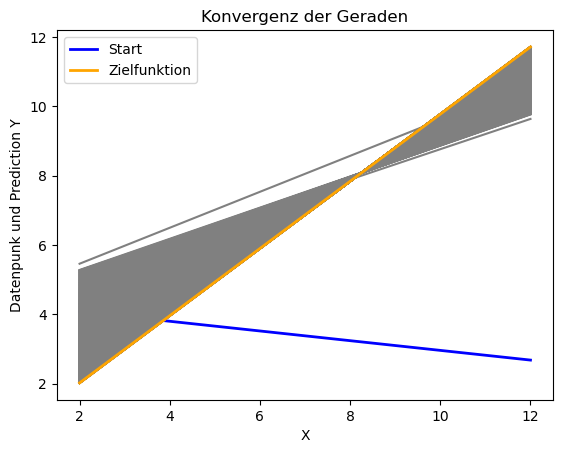

In [100]:
x_data = np.array([2, 4, 5, 6, 8, 10, 12])  # X-Werte als Numpy.
y_data =  np.array([1, 3, 5, 8, 9, 9, 11])  # Y-Werte als Numpy.
gradienten_abstieg(x_data,y_data, iterations=1000)